In [ ]:
%pip install biopython
%pip install seaborn
%pip install matplotlib
%pip install --pre torch torchvision --extra-index-url https://download.pytorch.org/whl/nightly/cpu
%pip install fastfcgr==1.0.0
%pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/nightly/cpu
You should

In [1]:
import sys
sys.path.append('seminar-dlmb-2024-winter-public/src/')
# from utility.file_utility import FileUtility
from amr.amr_utility import load_gene_data, create_gene_datasets

# Creating our dataset
create_gene_datasets("seminar-dlmb-2024-winter-public/", "seminar-dlmb-2024-winter-public/data/ds1")

# Loading the AMR prediction data
ds = load_gene_data("seminar-dlmb-2024-winter-public/data/ds1", "Klebsiella_pneumoniae_aztreonam", "gyrA")

seq_train = [x[1] for x in ds["train"]]
y_train = [x[2] for x in ds["train"]]

seq_test = [x[1] for x in ds["test"]]
y_test = [x[2] for x in ds["test"]]


FileNotFoundError: [Errno 2] No such file or directory: 'seminar-dlmb-2024-winter-public/data/Klebsiella_pneumoniae_aztreonam/train_seq.txt'

In [70]:
print('Num of samples in train data: {}'.format(len(seq_train)))
print('Num of samples in test data: {}'.format(len(seq_test)))


Num of samples in train data: 135
Num of samples in test data: 15


In [71]:
print('Input of the first element:\n{}'.format(seq_train[0]))
print('First label: {} -> resistant'.format(y_train[0]))

Input of the first element:
TATTCTTCGTCTTCGGCGATGTCGTCATCGGTATCCGCTTCCGGGGCGATATCGTCATCGCCTTCCGCCGCGCTACCGTCGATGGCATCCAGCTCTTCATCATCCACCGGCTCAGCCACGCGCTGCAGACCTACCACGTTTTCATCTTCCGCGGTGCGGATGAGGATCACGCCCTGGGTGTTACGGCCCACGATGCTCACTTCGGAAACGCGGGTACGCACCAGCGTCCCGGCGTCGGTGATCATCATGATCTGATCGCAGTCATCCACCTGCACGGCGCCGACCACGGAACCGTTACGCTCGGTGACTTTGATCGAAATAACGCCCTGGGTGGCACGCGACTTGGTCGGATACTCCGCCGCCGCGGTACGTTTACCGTAACCGTTTTGCGTCACCGTCAGGATCGCGCCTTCGCCGCGTGGAATAATCAGCGAGACGACGCTGTCGTTTTCCGCAAGCTTAATACCGCGTACGCCGGTGGCGGTACGGCCCATGGCGCGAACGGCGTCTTCCTTGAAGCGTACAACCTTACCGGCCGCGGAGAACAGCATCACTTCATCCTGACCAGAGGTCAGATCGACGCCGATCAGCTCATCGCCTTCGTTCAGGTTGACCGCGATGATACCGGCGGAACGCGGACGGCTGAACTCGGTCAGCGCGGTTTTCTTCACGGTACCGCTGGCGGTGGCCATAAAGACGTTGACGCCCTCTTCGTACTCGCGGACCGGCAGGATGGCGGTGATGCGCTCATCGGCTTCCAGCGGCAGCAGGTTGACGATCGGCCGACCGCGCGCGCCGCGGCTGGCTTCCGGCAGCTGATAGACCTTCATCCAGTACAGACGGCCGCGGCTTGAGAAGCAGAGGATGGTGTCATGGGTGTTGGCCACCAGCAGACGGTCGATAAAGTCTTCTTCTTTAATGCGCGCTGCCGATTTGCCTTTACCGCCACGACGCTGTGCTTCGTAGTCGGTC

In [72]:
import seaborn as sns
import numpy as np

Median and mean sequence length: 2634.0, 2632.296296296296


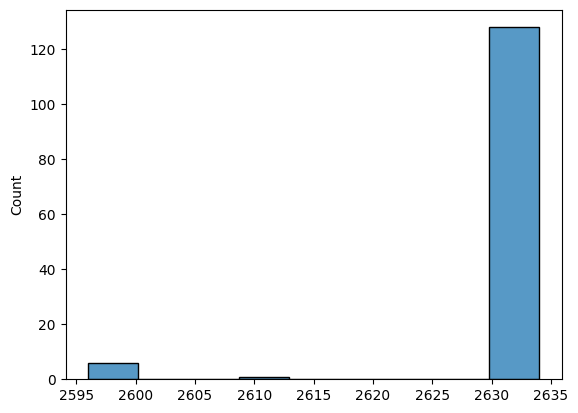

In [73]:
len_train = [len(s) for s in seq_train]
sns.histplot(len_train)
median = np.median(len_train)
mean = np.mean(len_train)
print('Median and mean sequence length: {}, {}'.format(median, mean))

In [74]:
uniq_vals = set(y_train)
y_train_int = list(map(int, y_train))
print('Labels in training data')
print('Non resistant: {}'.format(y_train_int.count(0)))
print('Resistant: {}'.format(y_train_int.count(1)))

Labels in training data
Non resistant: 11
Resistant: 124


In [75]:
uniq_vals = set(y_test)
y_test_int = list(map(int, y_test))
print('Labels in test data')
print('Non resistant: {}'.format(y_test_int.count(0)))
print('Resistant: {}'.format(y_test_int.count(1)))
print(type(y_train))

Labels in test data
Non resistant: 4
Resistant: 11
<class 'list'>


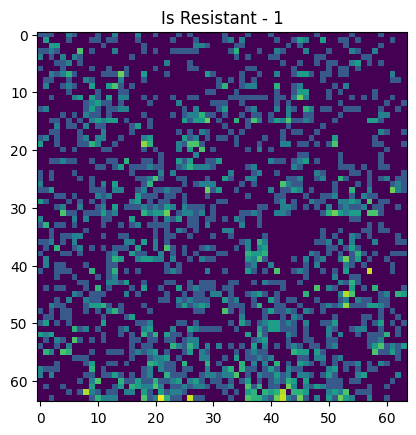

[[  0   0   0 ...   0  71  71]
 [  0   0   0 ... 142  71 112]
 [  0   0   0 ...  71  71   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [76]:
from fastfcgr import FastFCGR 

def test_fcgr():
    fcgr = FastFCGR()
# Example usage
    test_index = 15
    rna_seq = seq_train[test_index]
    fcgr.set_sequence(rna_seq)
    
    fcgr.calculate(scalingFactor=0.5)
    fcgr.print_matrix()
    fcgr.save_image("fcgr_output.png", d_max=255)

def generate_fcgr_images(sequences, kmer_length=6,scaling_factor=0.5):
    images = []
    for seq in sequences:
        fcgr = FastFCGR()
        fcgr.initialize(k=kmer_length, isRNA=False)
        fcgr.set_sequence(seq)
        fcgr.calculate(scalingFactor=scaling_factor)
        fcgr_matrix = fcgr.get_matrix

        img_data = np.log2(fcgr_matrix + 1)  
        img_data = (img_data/img_data.max() * 255).astype(np.uint8)
        images.append(img_data)
    
    return images

result = generate_fcgr_images(seq_train)

test_index = 80
from matplotlib import pyplot as plt
plt.title('Is Resistant - ' + str(y_train[test_index]))
plt.imshow(result[test_index], interpolation='nearest')
plt.show()

print(result[0])

In [78]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from torchvision import transforms

def one_hot_encode(dna_sequence,longest_length):
    # Define the mapping for one-hot encoding
    bases = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    
    # Initialize the encoding matrix
    encoding = np.zeros((4, 2000), dtype=np.float32)
    
    # Perform one-hot encoding
    for i, base in enumerate(dna_sequence):
        if base in bases:
            encoding[bases[base], i] = 1.0
    
    return encoding

class GenomeDataset(Dataset):
    def __init__(self, fcgr_images, sequences, labels, transform=None):
        self.images = fcgr_images
        self.sequences = sequences
        self.labels = labels
        self.transform = transform
        
        
        longest = max(sequences, key=len)
        length = len(longest)
        self.longest_sequence = length

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        sequence = one_hot_encode(self.sequences[idx],self.longest_sequence)

        if self.transform:
            image = self.transform(image)

        sequence = torch.from_numpy(sequence)

        return image, sequence, label


# Training/validation split and data loaders
def prepare_dataloaders(
    train_images,
    train_sequences,
    train_labels,
    test_images,
    test_sequences,
    test_labels,
    batch_size=32,
    val_split=0.2,
):
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
            transforms.Resize((64, 64), antialias=True),
        ]
    )
    train_dataset = GenomeDataset(
        train_images, train_sequences, train_labels, transform
    )
    test_dataset = GenomeDataset(test_images, test_sequences, test_labels, transform)

    train_split_dataset, val_split_dataset = random_split(
        train_dataset, [1 - val_split, val_split]
    )

    train_loader = DataLoader(train_split_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_split_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, val_loader, test_loader


def get_dataloaders(kmer_length=6, scaling_factor=0.5, batch_size=32):
    train_images = np.array(
        generate_fcgr_images(
            seq_train, kmer_length=kmer_length, scaling_factor=scaling_factor
        )
    )
    train_sequences = seq_train
    train_labels = y_train

    test_images = np.array(
        generate_fcgr_images(
            seq_test, kmer_length=kmer_length, scaling_factor=scaling_factor
        )
    )
    test_sequences = seq_test
    test_labels = y_test

    return prepare_dataloaders(
        train_images=train_images,
        train_sequences=train_sequences,
        train_labels=train_labels,
        test_images=test_images,
        test_sequences=test_sequences,
        test_labels=test_labels,
        batch_size=batch_size,
    )


train_loader, val_loader, test_loader = get_dataloaders()
print(next(iter(train_loader)))

IndexError: index 2000 is out of bounds for axis 1 with size 2000

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torch.optim as optim

class GenomeResistanceCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # FCGR pathway
        self.fcgr_branch = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3)
        )
        
        # Sequence pathway (1D CNN)
        self.seq_branch = nn.Sequential(
            nn.Conv1d(4, 16, 5),  # One-hot encoded
            nn.MaxPool1d(2)
        )
        
        # Fusion
        self.fc = nn.Linear(61792, 2)

    def forward(self, x_fcgr, x_seq):
        x1 = self.fcgr_branch(x_fcgr).flatten(1)
        x2 = self.seq_branch(x_seq).flatten(1) 
        x3 = torch.cat([x1,x2],dim=1)
        return self.fc(x3)



In [ ]:
def train_model(model, train_loader, val_loader, num_epochs=50, learning_rate=0.001):
    device = torch.device("mps" if torch.mps.is_available() else "cpu")
    model = model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    # For learning rate adjustment
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5
    )
    
    history = {
        'train_loss': [], 'val_loss': [],
        'train_acc': [], 'val_acc': []
    }
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss, train_correct, train_total = 0, 0, 0
        
        for inputs, sequences,labels in train_loader:
            inputs, sequences, labels = inputs.to(device), sequences.to(device),labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward + backward + optimize
            outputs = model(inputs,sequences)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # Statistics
            train_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        # Validation phase
        model.eval()
        val_loss, val_correct, val_total = 0, 0, 0
        
        with torch.no_grad():
            for inputs, sequences, labels in val_loader:
                inputs, sequences, labels = inputs.to(device),sequences.to(device), labels.to(device)
                
                outputs = model(inputs,sequences)
                loss = criterion(outputs, labels)
                
                # Statistics
                val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        # Calculate epoch metrics
        epoch_train_loss = train_loss / train_total
        epoch_train_acc = train_correct / train_total
        epoch_val_loss = val_loss / val_total
        epoch_val_acc = val_correct / val_total
        
        # Update learning rate if needed
        scheduler.step(epoch_val_loss)
        
        # Store history
        history['train_loss'].append(epoch_train_loss)
        history['val_loss'].append(epoch_val_loss)
        history['train_acc'].append(epoch_train_acc)
        history['val_acc'].append(epoch_val_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs} | '
              f'Train Loss: {epoch_train_loss:.4f} | '
              f'Train Acc: {epoch_train_acc:.4f} | '
              f'Val Loss: {epoch_val_loss:.4f} | '
              f'Val Acc: {epoch_val_acc:.4f}')
    
    return model, history


In [ ]:
def evaluate_model(model, test_loader):
    device = torch.device("mps" if torch.mps.is_available() else "cpu")
    model = model.to(device)
    model.eval()
    
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, sequences,labels in test_loader:
            inputs, sequences,labels = inputs.to(device),sequences.to(device), labels.to(device)
            outputs = model(inputs,sequences)
            _, predicted = torch.max(outputs, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Calculate metrics
    from sklearn.metrics import classification_report, confusion_matrix
    
    print("Classification Report:")
    print(classification_report(all_labels, all_preds))
    
    print("Confusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))
    
    return all_preds, all_labels


In [ ]:
torch.manual_seed(5477)
data_loader_train,data_loader_val,data_loader_test = get_dataloaders(kmer_length=5,scaling_factor=0.5,batch_size=32)
test_batch = next(iter(data_loader_train))
model =  GenomeResistanceCNN()

trained_model,history = train_model(model,data_loader_train,data_loader_val,num_epochs=500,learning_rate=0.001)
evaluate_model(trained_model,data_loader_test)

Epoch 1/500 | Train Loss: 2.4124 | Train Acc: 0.7963 | Val Loss: 1.0727 | Val Acc: 0.9259
Epoch 2/500 | Train Loss: 1.7864 | Train Acc: 0.6759 | Val Loss: 2.6641 | Val Acc: 0.9259
Epoch 3/500 | Train Loss: 2.6822 | Train Acc: 0.9167 | Val Loss: 3.4682 | Val Acc: 0.9259
Epoch 4/500 | Train Loss: 2.4107 | Train Acc: 0.9167 | Val Loss: 2.3260 | Val Acc: 0.9259
Epoch 5/500 | Train Loss: 1.2331 | Train Acc: 0.7685 | Val Loss: 2.0018 | Val Acc: 0.9259
Epoch 6/500 | Train Loss: 1.0208 | Train Acc: 0.9167 | Val Loss: 1.7610 | Val Acc: 0.9259
Epoch 7/500 | Train Loss: 0.8218 | Train Acc: 0.8889 | Val Loss: 1.3949 | Val Acc: 0.9259
Epoch 8/500 | Train Loss: 0.6163 | Train Acc: 0.9167 | Val Loss: 1.1497 | Val Acc: 0.9259
Epoch 9/500 | Train Loss: 0.5578 | Train Acc: 0.9167 | Val Loss: 1.0069 | Val Acc: 0.9259
Epoch 10/500 | Train Loss: 0.4714 | Train Acc: 0.9167 | Val Loss: 0.7089 | Val Acc: 0.9259
Epoch 11/500 | Train Loss: 0.3979 | Train Acc: 0.9167 | Val Loss: 0.4838 | Val Acc: 0.9259
Epoch 12

/Users/jb/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jb/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jb/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


([np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1)],
 [np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(1)])